In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump,load

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv')

In [3]:
df.head(2)

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [4]:
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price')

In [5]:
x=df[['Mendacium','Depth']]
y=df['Price']

In [6]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2,random_state=0)

In [7]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [8]:
print("score:", model.score(xtest,ytest) * 100)
pred = model.predict(x)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 94.90354715374232
mse: 14.35238729335773
mae: 2.8217874294622023


<AxesSubplot:ylabel='Density'>

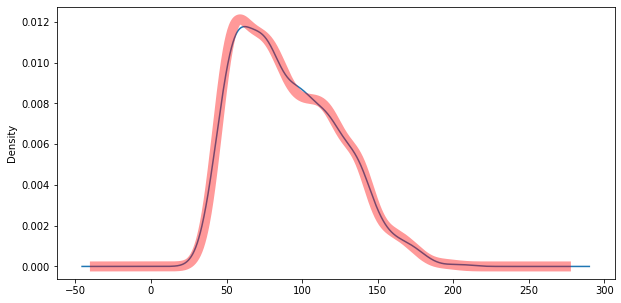

In [9]:
df['p1'] = pred
ax = df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4, color='red',linewidth=10)

In [10]:
dump(model,"oil_pricing.pk1")

['oil_pricing.pk1']